all library 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

read dataset from the file 

In [2]:

df_data = pd.read_csv("dataset_B_05_2020.csv")


take copy of dataset

In [4]:
df=df_data.copy()

Lignes and column

In [37]:
df.shape

(11430, 89)

<AxesSubplot: >

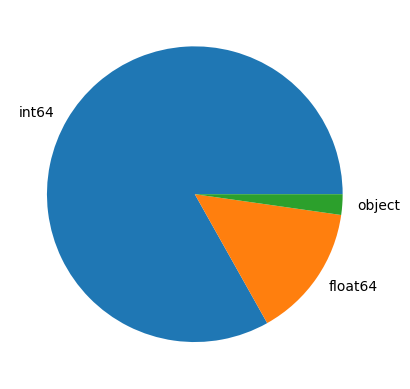

In [12]:
df.dtypes.value_counts().plot.pie()

Detect missing values

<AxesSubplot: >

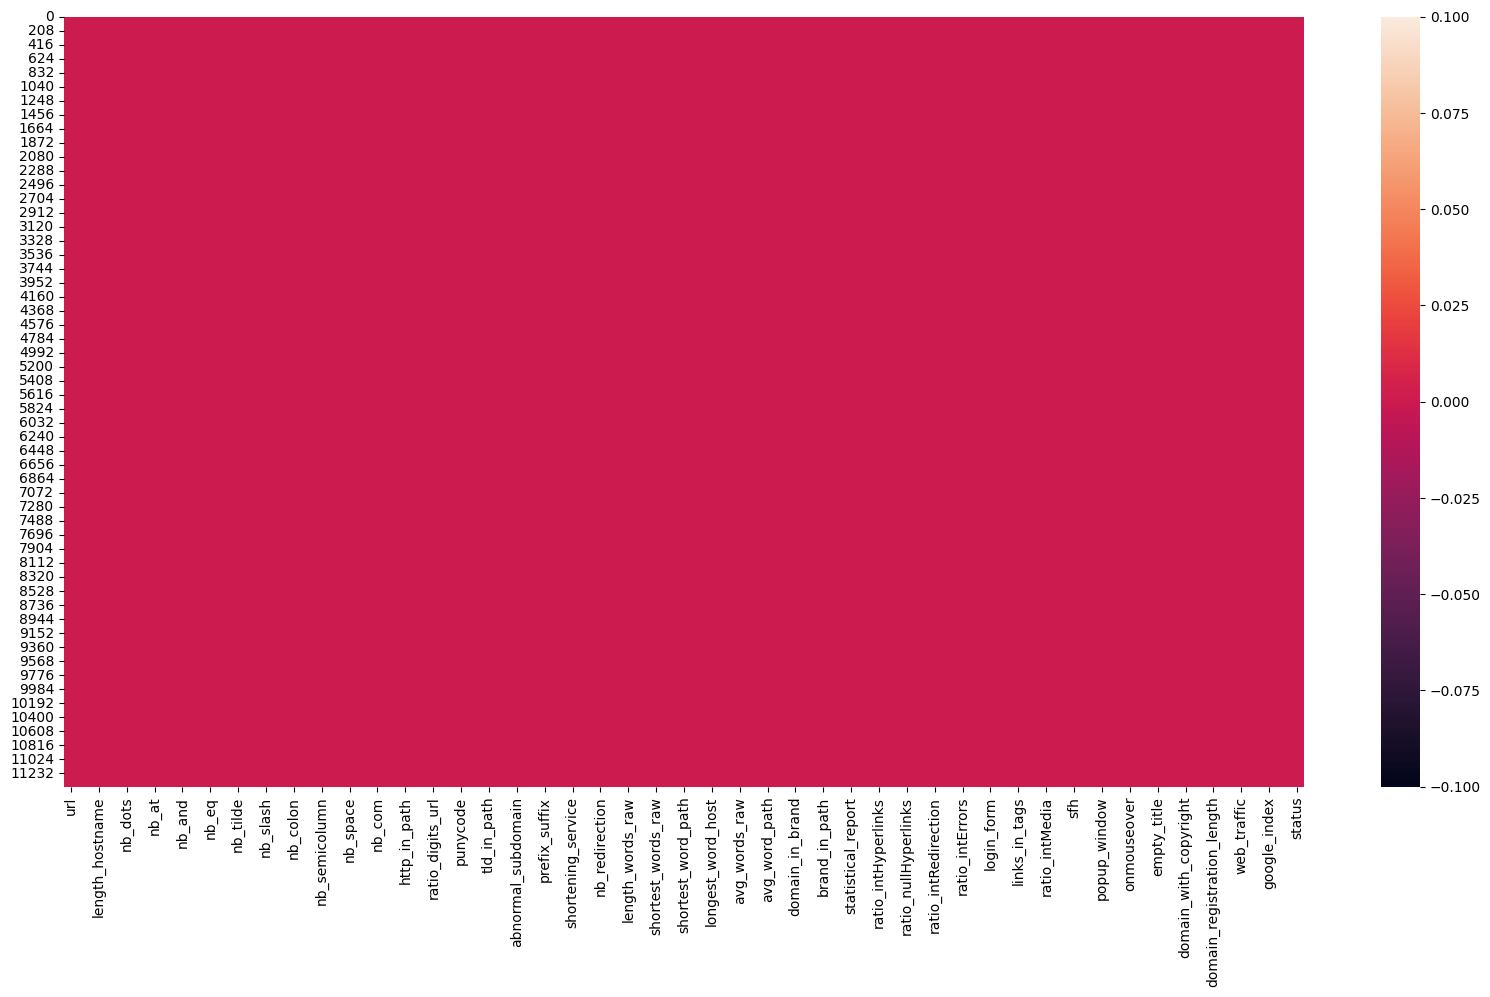

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

Detect numbers missing values forech column

In [14]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

url                     0.0
ratio_extRedirection    0.0
ratio_intRedirection    0.0
nb_extCSS               0.0
ratio_nullHyperlinks    0.0
                       ... 
https_token             0.0
http_in_path            0.0
nb_dslash               0.0
shortest_word_host      0.0
status                  0.0
Length: 89, dtype: float64

bottom analysis
  1-initial visualization :elimination of unnecessary columns


In [15]:
#df=df[df.columns[df.isin().sam()/df.shape[0]<2]]

drop column id url because it is useless

In [16]:
#df.drop("idUrl",axis=1)

target column review

In [17]:
df["status"].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64


histograms of continuous variables

In [ ]:
for col in df.select_dtypes("int64"):
    plt.figure(figsize=(20,10))
    sns.histplot(df[col],kde=True)

that is mean the variable page_rank has brobaly 1500 value equale to 4

In [57]:
df["page_rank"][df["page_rank"]==4].value_counts()

4    1380
Name: page_rank, dtype: int64

histograms of continuous variables

In [ ]:
for col in df.select_dtypes("float"):
    plt.figure(figsize=(20,10))
    sns.histplot(df[col],kde=True)

histograms of object 

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}')


variable target relationship

create tow group  legitimate and phishing

In [8]:
legitimate_df=df[df["status"]=="legitimate"]
phishing_df=df[df["status"]=="phishing"]
df_column=df.columns




Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

<AxesSubplot: xlabel='ip', ylabel='count'>

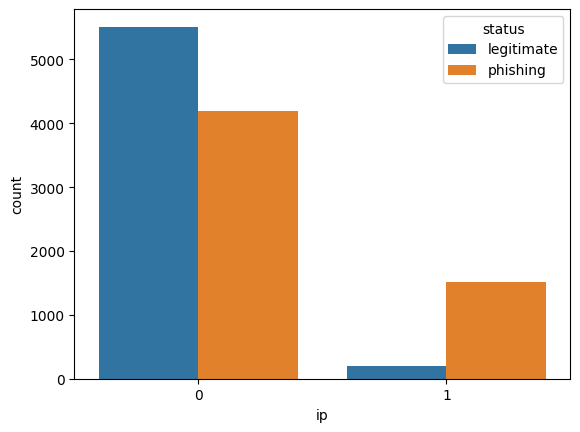

In [23]:
sns.countplot(x="ip",hue="status",data=df)

In [24]:
pd.crosstab(df["status"],df["ip"])

ip,0,1
status,,
legitimate,5512,203
phishing,4197,1518


In [ ]:
for col in df_column:
    plt.figure()
    sns.heatmap(pd.crosstab(df["status"],df[col]),annot=True,fmt="d")

Relationship variable with variable

In [ ]:
#sns.pairplot(df)

In [ ]:
df.columns

In [ ]:

for col in df_column:
    plt.figure()
    sns.lmplot(x="ip",y=col,hue="status",data=df)

relationship length_url

sns.heatmap()

In [ ]:
#df.corr()["length_url"].sort_values(ascending=False).head(10)
def correlation_matrix(df):
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
    plt.show()
correlation_matrix(df)



C:\Users\rrbou\AppData\Local\Temp\ipykernel_12540\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

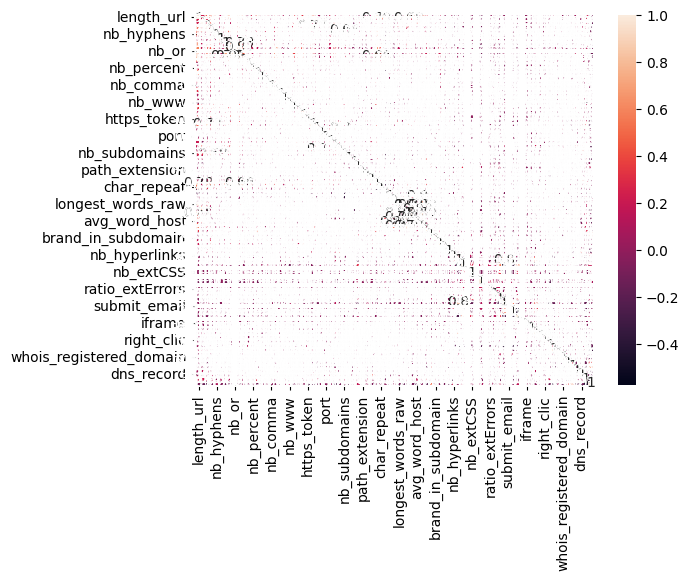

In [5]:
sns.heatmap(df.corr(),annot=True)

47 min https://www.youtube.com/watch?v=u64sWJEP4S0&ab_channel=MachineLearnia